In [ ]:
from mod1 import *
def day_week_month_data(market='일야', start_day = '2020-01-01',period ='month'):
    if market=='kospi' or market=='kosdaq':
        df = select_market(market,start_day)
    else :
        df = select_stock(market,start_day)
    df['Date']=pd.to_datetime(df['Date'])
    months = [g for n, g in df.groupby(pd.Grouper(key='Date',freq='M'))]  ##   월별
    weeks = [g for n, g in df.groupby(pd.Grouper(key='Date',freq='W'))]  ##   주별
    columns = ['Date','Open', 'High', 'Low', 'Close', 'Volume']
    rows = []    

    if period == 'day':
        
        df=df[['Date','Open', 'High', 'Low','Close', 'Volume']]
        df.columns=columns
        #df = df.set_index(df['date'])
        return df
    
    elif period == 'month':
        period = months
        
    elif period == 'week':
        period = weeks
        
    for i in range(len(period)):
        rows.append(period[i].iloc[-1]['Date'])
        rows.append(period[i].iloc[0]["Open"])
        rows.append(max(period[i]['High']))
        rows.append(min(period[i]['Low']))
        rows.append(period[i].iloc[-1]['Close'])
        rows.append(sum(period[i]['Volume']))
        
    arr = np.array(rows)
    arr1 = arr.reshape(len(period),6)
    df = pd.DataFrame(data=arr1, columns=columns)
    df = df.set_index(df['Date'])
    df.rename(columns = {'Date' : 'Date1'}, inplace = True)
    return df 

#df = select_stock('AJ네트웍스','2020-06-01')
df = day_week_month_data(market='kospi',start_day = '2019-01-01',period='month')
df

def bokeh_chart(market='kospi',start_day = '2019-01-01', period ='month'):
    from math import pi
    from bokeh.io import output_notebook, show
    from bokeh.plotting import figure
    from bokeh.layouts import gridplot

    output_notebook()
    
    df = day_week_month_data(market, start_day, period)
    
    mids = (df.Open + df.Close)/2
    spans = abs(df.Close-df.Open)

    inc = df.Close >= df.Open
    dec = df.Open > df.Close

    TOOLS = "pan,wheel_zoom,box_zoom,reset,save,crosshair"

    p_candlechart = figure(x_axis_type="datetime", tools=TOOLS, plot_width=900, plot_height=200, toolbar_location="left",title = market)
    p_candlechart.xaxis.major_label_orientation = pi/4
    p_candlechart.segment(df.index[inc], df.High[inc], df.index[inc], df.Low[inc], color="red")
    p_candlechart.segment(df.index[dec], df.High[dec], df.index[dec], df.Low[dec], color="blue")
    p_candlechart.vbar(df.index[inc], 0.5, df.Open[inc], df.Close[inc], fill_color="red", line_color="red",line_width=10)
    p_candlechart.vbar(df.index[dec], 0.5, df.Open[dec], df.Close[dec], fill_color="blue", line_color="blue",line_width=10)

    p_volumechart = figure(x_axis_type="datetime", tools=TOOLS, plot_width=900, plot_height=200, toolbar_location="left")
    p_volumechart.vbar(df.index, 0.5, df.Volume, fill_color="black", line_color="black",line_width=10)

    p = figure(tools='crosshair', plot_width=900, toolbar_location="left")
    p = gridplot([[p_candlechart], [p_volumechart]], toolbar_location='left')
    show(p)
bokeh_chart(market='kospi',start_day = '2019-01-01', period ='month')

In [ ]:
from mod1 import *

In [4]:
from mod1 import *

def day_week_month_data(market='kospi', start_day = '2020-01-01',period ='month'):
    if market=='kospi' or market=='kosdaq':
        df = select_market(market,start_day)
    else :
        df = select_stock(market,start_day)
        
    df['Date']=pd.to_datetime(df['Date'])
    months = [g for n, g in df.groupby(pd.Grouper(key='Date',freq='M'))]  ##   월별
    weeks = [g for n, g in df.groupby(pd.Grouper(key='Date',freq='W'))]  ##   주별
    columns = ['Date','Open', 'High', 'Low', 'Close', 'Volume']
    rows = []    

    if period == 'day':
        df=df[['Date','Open', 'High', 'Low','Close', 'Volume']]
        df.columns=columns
        #df = df.set_index(df['date'])
        return df    
    if period == 'month':
        period = months
    elif period == 'week':
        period = weeks
        
    for i in range(len(period)):
        rows.append(period[i].iloc[-1]['Date'])
        rows.append(period[i].iloc[0]["Open"])
        rows.append(max(period[i]['High']))
        rows.append(min(period[i]['Low']))
        rows.append(period[i].iloc[-1]['Close'])
        rows.append(sum(period[i]['Volume']))
        
    arr = np.array(rows)
    arr1 = arr.reshape(len(period),6)
    df = pd.DataFrame(data=arr1, columns=columns)
    df = df.set_index(df['Date'])
    df.rename(columns = {'Date' : 'Date1'}, inplace = True)  ##  Bokeh_Chart에서 Date index를사용하기위해 Colume명 Date를 Date1으로변경
    return df 

#df = select_stock('AJ네트웍스','2020-06-01')


def depress(period):
    today = datetime.now().strftime('%Y-%m-%d')
    path_depress = 'd:\\stockdata\\depress\\depress_'
    if period=='month':
        start_day='2019-01-01'
        
    elif period=='week' :
        start_day='2020-01-01'
        
    else :
        start_day='2020-05-01'
        
    df = all_stock('2020-06-22')
    df = df['Name']
    name = df.to_list()

    #name=['팜스코','hrs','디지털대성']
    count = 0
    depress=[]
    for i in name:
        df = day_week_month_data(market=i,start_day=start_day,period=period)
        df['yesterday']=df.Close.shift(1)
        df['minus']=(df['Close']-df['yesterday']) < 0
        df1 = df.sort_values(by=['Date'], axis=0, ascending=False,ignore_index=True )
        minus = df1.minus.values

        for i in minus:
            if i == True:
                count += 1

            else:
                break

        #print(count)
        depress.append(count)
        count=0


    df2= pd.DataFrame()
    df2['name']=name
    df2['count']=depress
    df3 = df2.sort_values(by=['count'], axis=0, ascending=False,ignore_index=True )
    if period=='month':
        df3 = df3.iloc[:100]
    elif period=='week':
        df3 = df3.iloc[:200]
    elif period=='day':
        df3 = df3.iloc[:300]
    #else:
       # break
    df3.to_excel(path_depress+today+'_'+period+'.xlsx')
    #return df3


three_period=['day','week','month']
for i in three_period:
    depress(i)

In [2]:
##  일봉상 연속으로 하락한 종목을 순서대로 정렬

from mod1 import *

def depress(period):
    if period=='month':
        start_day='2019-01-01'
        
    elif period=='week' :
        start_day='2020-01-01'
        
    else :
        start_day='2020-05-01'
        
    df = all_stock('2020-06-22')
    df = df['Name']
    #df = df.iloc[332:333]
    name = df.to_list()

    #name=['팜스코','hrs','디지털대성']
    count = 0
    depress=[]
    for i in name:
        df = day_week_month_data(market=i,start_day=start_day,period=period)
        df['yesterday']=df.Close.shift(1)
        df['minus']=(df['Close']-df['yesterday']) < 0
        df1 = df.sort_values(by=['Date'], axis=0, ascending=False,ignore_index=True )
        minus = df1.minus.values

        for i in minus:
            if i == True:
                count += 1

            else:
                break

        #print(count)
        depress.append(count)
        count=0


    df2= pd.DataFrame()
    df2['name']=name
    df2['count']=depress
    df3 = df2.sort_values(by=['count'], axis=0, ascending=False,ignore_index=True )
    #df3.to_excel('d:\depress_month.xlsx')
    return df3
depress('day')

,name,count
0,대구백화점,7
1,현대위아,4
2,뉴지랩,4
3,티웨이홀딩스,4
4,LG하우시스,4
...,...,...
2196,레이,0
2197,유양디앤유,0
2198,레몬,0
2199,레고켐바이오,0


In [ ]:
##  일봉상 연속으로 하락한 종목을 순서대로 정렬

from mod1 import *

def dep(start,delay):

    #df = all_stock('2020-06-12')
    #df = df['Name']
    #df = df.iloc[332:333]
    #name = df.to_list()

    name=['팜스코','에이프로젠 KIC','디지털대성']
    count = 0
    depress=[]
    for i in name:
        df = day_week_month_data(market=i,start_day='2020-01-01',period='month')
        df['yesterday']=df.Close.shift(1)
        df['minus']=(df['Close']-df['yesterday']) < 0
        df1 = df.sort_values(by=['Date'], axis=0, ascending=False,ignore_index=True )
        minus = df1.minus.values

        for i in minus:


            if i == True:
                count += 1

            else:

                break

        #print(count)
        depress.append(count)
        count=0


    df2= pd.DataFrame()
    df2['name']=name
    df2['count']=depress
    df3 = df2.sort_values(by=['count'], axis=0, ascending=False,ignore_index=True )
    #df3.to_excel('d:\depress_month.xlsx')

    df3

In [ ]:
from mod1 import *

df = select_stock('hrs','2019-01-01')
df = df.set_index('Date')
df.columns = df.columns.str.lower()
df[['open','high','low','volume','close']] = df[['open','high','low','volume','close']].astype(float)

close=df['close'].values
up, mid, low = BBANDS(close, timeperiod=14, nbdevup=2, nbdevdn=2, matype=0)
df['BB_up']=up
df['BB_mid']=mid
df['BB_low']=low

rsi = ta.RSI(df, timeperiod=13)
df['RSI']=rsi

up, mid, low = BBANDS(close, timeperiod=14, nbdevup=2, nbdevdn=2, matype=0)
bbp = (df['close'] - low) / (up - low)
df['BBP']=bbp
#display(bbp.head())

index=df.index
max_holding = 100

holdings = pd.DataFrame(index=df.index, data={'Holdings': np.array([np.nan] * index.shape[0])})
holdings.loc[((df['RSI'] < 30) & (df['BBP'] < 0)), 'Holdings'] = max_holding
holdings.loc[((df['RSI'] > 70) & (df['BBP'] > 1)), 'Holdings'] = 0
holdings.ffill(inplace=True)
holdings.fillna(0, inplace=True)

holdings['Order'] = holdings.diff()
holdings.dropna(inplace=True)

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
ax0.plot(index, df['close'], label='Close')
ax0.set_xlabel('Date')
ax0.set_ylabel('close')
ax0.grid()

for day, holding in holdings.iterrows():
    order = holding['Order']
    if order > 0:
        ax0.scatter(x=day, y=df.loc[day, 'close'], color='green')
    elif order < 0:
        ax0.scatter(x=day, y=df.loc[day, 'close'], color='red')

ax1.plot(index, df['RSI'], label='RSI')
ax1.fill_between(index, y1=30, y2=70, color='#adccff', alpha='0.3')
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI')
ax1.grid()

ax2.plot(index, df['BB_up'], label='BB_up')
ax2.plot(index, df['close'], label='AdjClose')
ax2.plot(index, df['BB_low'], label='BB_low')
ax2.fill_between(index, y1=df['BB_low'], y2=df['BB_up'], color='#adccff', alpha='0.3')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bollinger Bands')
ax2.grid()

fig.tight_layout()
plt.show()

In [ ]:
from mod1 import *
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

def close_ma(df,select1,select2):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2]
    df1 = df1.set_index(df['date'])
    df1.plot(figsize=(16,4))
    plt.title(df['name'][0])
    plt.grid(True)
    plt.show()

def close_ma_vol(df,select1,select2,select3):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2,select3]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2,select3]
    df1 = df1.set_index(df['date'])
    df1.plot(figsize=(16,4))
    plt.title(df['name'][0])
    plt.grid(True)
    plt.show()    
    
def rsi(df):
    talib_rsi = ta.RSI(df, timeperiod=14)
    df['rsi_14'] = talib_rsi
    df = df.set_index(df['date'])
    
    plt.figure(figsize=(16,4))
    plt.plot(df['rsi_14'])
    plt.fill_between(df.index,y1=30, y2=70, color='#adccff', alpha='0.3')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.grid()
    plt.show()
    
def obv(df):
    real = ta.OBV(df)
    df = df.set_index('date')
    plt.figure(figsize=(16,4))
    plt.plot(real)
    plt.xlabel('Date')
    plt.grid()
    plt.show()
    

#SuperTrend
def ST(df,f,n): #df is the dataframe, n is the period, f is the factor; f=3, n=7 are commonly used.
    #Calculation of ATR
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1)
    df['ATR']=np.nan
    df.at[n-1,'ATR']=df['TR'][:n-1].mean() #.ix is deprecated from pandas verion- 0.19
    for i in range(n,len(df)):
        df['ATR'][i]=(df['ATR'][i-1]*(n-1)+ df['TR'][i])/n

    #Calculation of SuperTrend
    df['Upper Basic']=(df['High']+df['Low'])/2+(f*df['ATR'])
    df['Lower Basic']=(df['High']+df['Low'])/2-(f*df['ATR'])
    df['Upper Band']=df['Upper Basic']
    df['Lower Band']=df['Lower Basic']
    for i in range(n,len(df)):
        if df['Close'][i-1]<=df['Upper Band'][i-1]:
            df['Upper Band'][i]=min(df['Upper Basic'][i],df['Upper Band'][i-1])
        else:
            df['Upper Band'][i]=df['Upper Basic'][i]    
    for i in range(n,len(df)):
        if df['Close'][i-1]>=df['Lower Band'][i-1]:
            df['Lower Band'][i]=max(df['Lower Basic'][i],df['Lower Band'][i-1])
        else:
            df['Lower Band'][i]=df['Lower Basic'][i]   
    df['SuperTrend']=np.nan
    for i in df['SuperTrend']:
        if df['Close'][n-1]<=df['Upper Band'][n-1]:
            df['SuperTrend'][n-1]=df['Upper Band'][n-1]
        elif df['Close'][n-1]>df['Upper Band'][i]:
            df['SuperTrend'][n-1]=df['Lower Band'][n-1]
    for i in range(n,len(df)):
        if df['SuperTrend'][i-1]==df['Upper Band'][i-1] and df['Close'][i]<=df['Upper Band'][i]:
            df['SuperTrend'][i]=df['Upper Band'][i]
        elif  df['SuperTrend'][i-1]==df['Upper Band'][i-1] and df['Close'][i]>=df['Upper Band'][i]:
            df['SuperTrend'][i]=df['Lower Band'][i]
        elif df['SuperTrend'][i-1]==df['Lower Band'][i-1] and df['Close'][i]>=df['Lower Band'][i]:
            df['SuperTrend'][i]=df['Lower Band'][i]
        elif df['SuperTrend'][i-1]==df['Lower Band'][i-1] and df['Close'][i]<=df['Lower Band'][i]:
            df['SuperTrend'][i]=df['Upper Band'][i]
    #return df    
    df = df.set_index(df['Date'])
    df[['Close','SuperTrend']].plot(figsize=(16,4))
    plt.title(name)
    plt.grid(True)
    plt.show()        
    
#name = ['이더블유케이','에스와이','위지윅스튜디오','비트컴퓨터']   
name = ['오공','링네트','이씨에스','알서포트','동국산업','원익홀딩스','강스템바이오텍']
for i in name:
    df = select_stock(i,'2020-01-01')
    ST(df,3,7)
    close_ma(df,'ma5','ma20')
    rsi(df)
    obv(df)
    #close_ma_vol(df,'ma60','ma120','volume')
    

In [ ]:
from mod1 import *

def rsi(df):
    talib_rsi = ta.RSI(df, timeperiod=14)
    df['rsi_14'] = talib_rsi
    df = df.dropna(axis=0)
    display(df)
    df = df.set_index(df['date'])

    
    plt.figure(figsize=(16,4))
    plt.plot(df['rsi_14'])
    plt.fill_between(df.index,y1=30, y2=70, color='#adccff', alpha='0.3')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.grid()
    plt.show()
    
df = select_stock('hrs','2018-01-01')
#df = df.set_index('Date')
df.columns = df.columns.str.lower()
df[['open','high','low','volume','close']] = df[['open','high','low','volume','close']].astype(float)

rsi(df)


In [ ]:
df

In [ ]:
from mod1 import *

df = select_stock('한국화장품','2019-01-01')
df = df.set_index('Date')
df.columns = df.columns.str.lower()
df[['open','high','low','volume','close']] = df[['open','high','low','volume','close']].astype(float)

close = df['close'].values
up, mid, low = BBANDS(close, timeperiod=14, nbdevup=2, nbdevdn=2, matype=0)
df['BB_up']=up
df['BB_mid']=mid
df['BB_low']=low

rsi = ta.RSI(df, timeperiod=14)
df['RSI']=rsi

up, mid, low = BBANDS(close, timeperiod=14, nbdevup=2, nbdevdn=2, matype=0)
bbp = (df['close'] - low) / (up - low)
df['BBP']=bbp
#display(bbp.head())

index=df.index
max_holding = 100

holdings = pd.DataFrame(index=df.index, data={'Holdings': np.array([np.nan] * index.shape[0])})
holdings.loc[((df['RSI'] < 30) & (df['BBP'] < 0)), 'Holdings'] = max_holding
holdings.loc[((df['RSI'] > 70) & (df['BBP'] > 1)), 'Holdings'] = 0
holdings.ffill(inplace=True)
holdings.fillna(0, inplace=True)

holdings['Order'] = holdings.diff()
holdings.dropna(inplace=True)

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
ax0.plot(index, df['close'], label='Close')
ax0.set_xlabel('Date')
ax0.set_ylabel('close')
ax0.grid()

for day, holding in holdings.iterrows():
    order = holding['Order']
    if order > 0:
        ax0.scatter(x=day, y=df.loc[day, 'close'], color='green')
    elif order < 0:
        ax0.scatter(x=day, y=df.loc[day, 'close'], color='red')

ax1.plot(index, df['RSI'], label='RSI')
ax1.fill_between(index, y1=30, y2=70, color='#adccff', alpha='0.3')
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI')
ax1.grid()

ax2.plot(index, df['BB_up'], label='BB_up')
ax2.plot(index, df['close'], label='AdjClose')
ax2.plot(index, df['BB_low'], label='BB_low')
ax2.fill_between(index, y1=df['BB_low'], y2=df['BB_up'], color='#adccff', alpha='0.3')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bollinger Bands')
ax2.grid()

fig.tight_layout()
plt.show()

# vote_stock

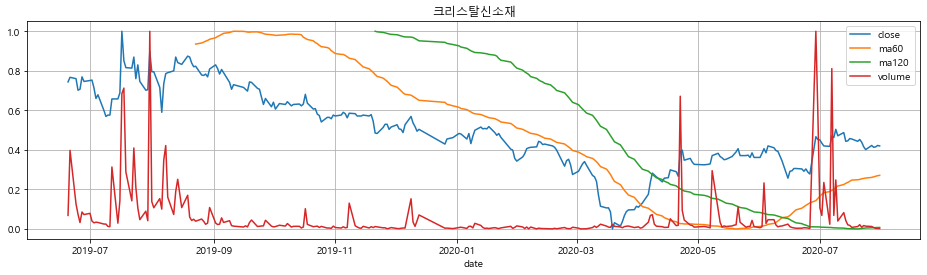

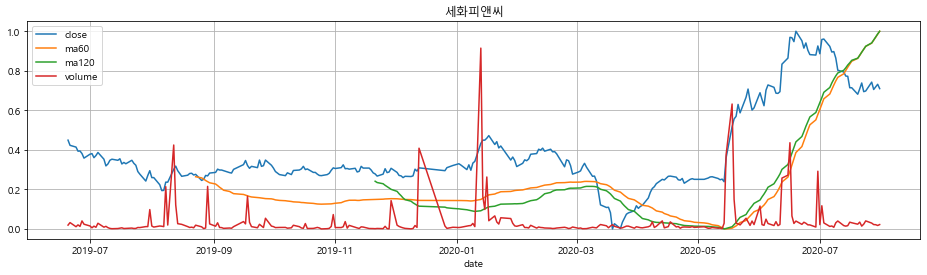

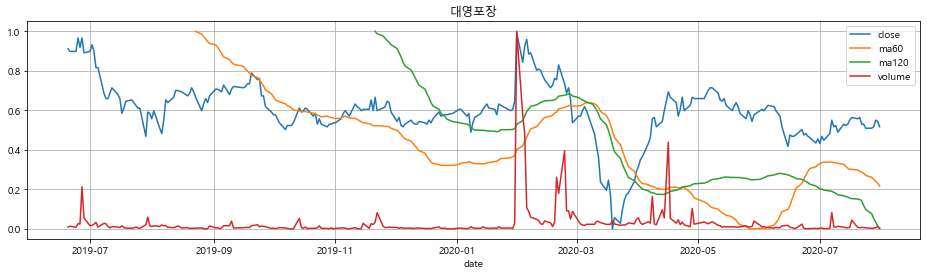

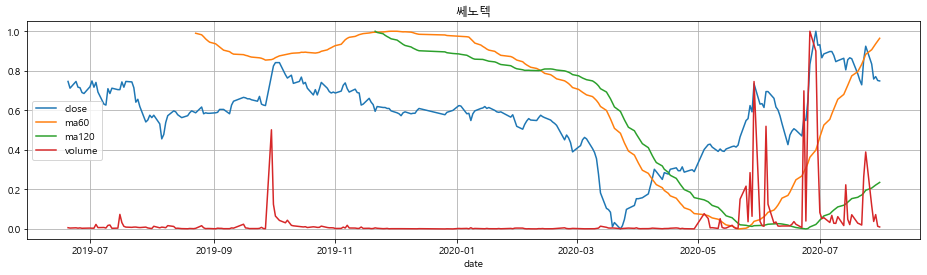

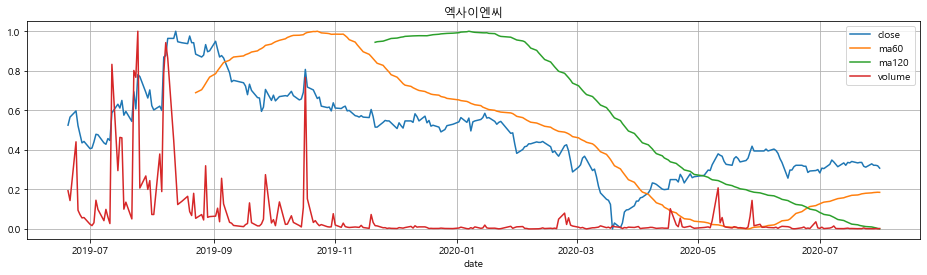

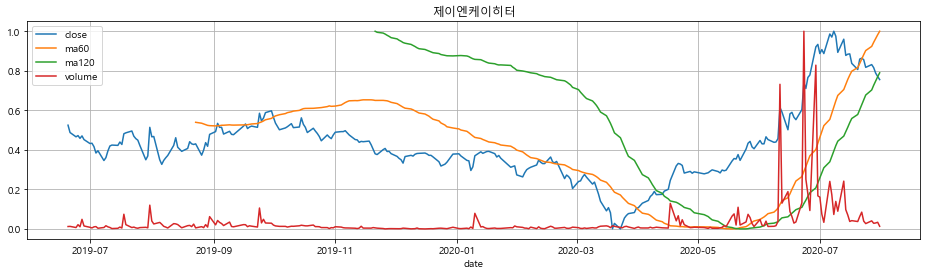

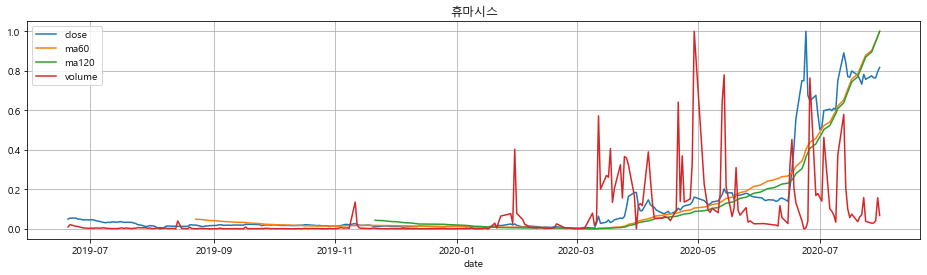

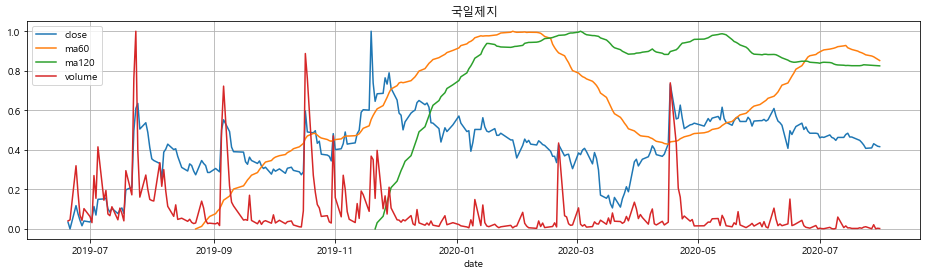

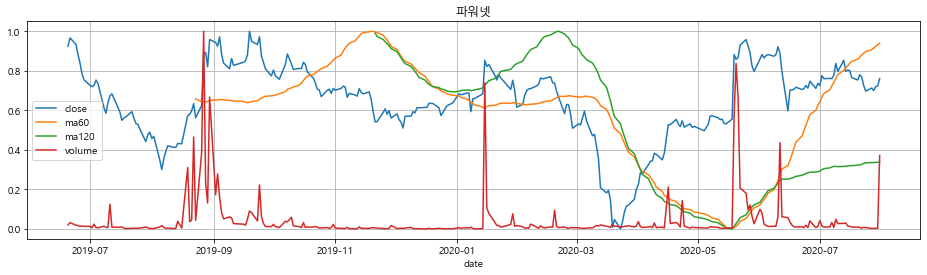

Exception: inputs are all NaN

In [7]:
from mod1 import *
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

path = 'f:\\stockdata\\close_ma120\\close_ma120_'
path_total_f = 'f:\\stockdata\\close_ma120\\total_filter_'
path_price = 'f:\\stockdata\\vote_stock\\detect_stock_with_price_'
path_volume = 'f:\\stockdata\\vote_stock\\detect_stock_with_volume_'

choice_date='2019-05-29'
df_volume = pd.read_excel(path_volume+choice_date+'.xlsx')
name_volume = df_volume['Name']

def close_ma(df,select1,select2):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2]
    df1 = df1.set_index(df['date'])
    df1.iloc[14:].plot(grid=True,figsize=(16,4));
    plt.title(df['name'][0])
    plt.show()

def close_ma_vol(df,select1,select2,select3):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2,select3]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2,select3]
    df1 = df1.set_index(df['date'])
    df1.iloc[14:].plot(grid=True,figsize=(16,4));
    plt.title(df['name'][0])
    plt.show()    
    
def rsi(df):
    df = df.set_index('date')
    talib_rsi = ta.RSI(df, timeperiod=14)
    talib_rsi.iloc[14:].plot( grid=True,figsize=(16,4))
    plt.fill_between(df.index,y1=30, y2=70, color='#adccff', alpha='0.3')
    plt.show()
    
def obv(df):
    df = df.set_index('date')
    real = ta.OBV(df)
    real.iloc[14:].plot( y=['volume'], grid=True,figsize=(16,4));
    plt.show()

for i in name_volume:
    df = select_market(i,choice_date)
    #close_ma(df,'ma60','ma120')
    #rsi(df)
    #obv(df)
    close_ma_vol(df,'ma60','ma120','volume')
    


# stock_data

In [ ]:

from mod1 import *
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

path = 'd:\\stockdata\\close_ma120\\close_ma120_'
path_total_f = 'd:\\stockdata\\close_ma120\\total_filter_'
path_total_c = 'd:\\stockdata\\close_ma120\\total_c_'
path_total_b = 'd:\\stockdata\\close_ma120\\total_b_'
path_price = 'd:\\stockdata\\vote_stock\\detect_stock_with_price_'
path_volume = 'd:\\stockdata\\vote_stock\\detect_stock_with_volume_'

choice_date='2019-10-04'
df = pd.read_excel(path_total_f+choice_date+'.xlsx')
name = df['name_x']
#name=['hrs','디엔에프','푸드나무','이에스브이']

def close_ma(df,select1,select2):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2]
    df1 = df1.set_index(df['date'])
    df1.iloc[14:].plot(grid=True,figsize=(16,4));
    plt.title(df['name'][0])
    plt.show()

def close_ma_vol(df,select1,select2,select3):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2,select3]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2,select3]
    df1 = df1.set_index(df['date'])
    df1.iloc[14:].plot(grid=True,figsize=(16,4));
    plt.title(df['name'][0])
    plt.show()    
    
def rsi(df):
    df = df.set_index('date')
    talib_rsi = ta.RSI(df, timeperiod=14)
    talib_rsi.iloc[14:].plot( grid=True,figsize=(16,4))
    plt.fill_between(df.index,y1=30, y2=70, color='#adccff', alpha='0.3')
    plt.show()
    
def obv(df):
    df = df.set_index('date')
    real = ta.OBV(df)
    real.iloc[14:].plot( y=['volume'], grid=True,figsize=(16,4));
    plt.show()
    
#name = ['서원','hrs']   
for i in name:
    df = select_stock(i,'2008-01-01')
    close_ma(df,'ma60','ma120')
    rsi(df)
    obv(df)
    close_ma_vol(df,'ma60','ma120','volume')

In [ ]:
def relative_strength_index(df, n):
    """
    Calculate Relative Strength Index(RSI) for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
    RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    df = df.join(RSI)
    
    return df

# Add RSI feature
data = relative_strength_index(data, 14)

# check missing values
data.isnull().sum()

data.dropna(inplace=True)

# Visual sanity check of features

f = 100
t = 300
data.iloc[f:t].plot(x='Date', y=['SMA10', 'EWA30', 'Close'], figsize=(16,4),grid=True,title="A sample of the data with SMA and EWA");
data.iloc[f:t].plot(x='Date', y=['Momentum_5'], grid=True,figsize=(16,4));

data.iloc[f:t].plot(x='Date', y=['RSI_14'], grid=True, figsize=(16,4));

# a_1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from torch.autograd import Variable
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torch.utils.data

from sklearn.naive_bayes import GaussianNB

%matplotlib inline

from mod1 import *

data = select_stock('hrs','2010-01-01')


# Change type to datetime
data['Date'] = pd.to_datetime(data['Date'])


# Reorder columns in a reasonble order
data = data[['Date', 'High', 'Low', 'Close', 'Volume']].copy()


# Make a target variable that describes if stock market closes up or down next day
data['Direction'] = data.Close.diff().shift()


# Moving average indicators, short, medium and long term
data['SMA10'] = data.Close.rolling(10).mean()
data['SMA30'] = data.Close.rolling(30).mean()
data['SMA90'] = data.Close.rolling(90).mean()

# Exponential moving average 
data['EWA10'] = data['Close'].ewm(span=10, min_periods=10).mean()
data['EWA30'] = data['Close'].ewm(span=30, min_periods=30).mean()
data['EWA90'] = data['Close'].ewm(span=90, min_periods=90).mean()

# Stochastic Osciallator
data['SOI'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])

# 10, 5 and 2 Day Momentum
data['Momentum_10'] = data['Close'].diff(10)
data['Momentum_5'] = data['Close'].diff(5)
data['Momentum_2'] = data['Close'].diff(2)

# Standard deviation
data['Std_10'] = data['Close'].rolling(10, min_periods=10).std()


# Daily variation (High - low)
data['Daily_variation'] = (data['High'] - data['Low']) / data['Close']

# Day of week
data['Day'] = data.Date.dt.dayofweek

# Month of year
data['Month'] = data.Date.dt.month_name()

# Replace day of week number with string in order to make categorical dummy variables
data['Day'].replace({0: 'Monday', 1 : 'Tuesday', 2: 'Wednesday', 3 : 'Thursday', 4 : 'Friday'}, inplace=True);

# Make dummy variables out of cateorical features 
data = pd.get_dummies(data);

def relative_strength_index(df, n):
    """
    Calculate Relative Strength Index(RSI) for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
    RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    df = df.join(RSI)
    
    return df

# Add RSI feature
data = relative_strength_index(data, 14)

# check missing values
data.isnull().sum()

data.dropna(inplace=True)

# Visual sanity check of features

f = 800
t = 1500
data.iloc[f:t].plot(x='Date', y=['SMA10', 'EWA30', 'Close'], figsize=(16,4),grid=True,title="A sample of the data with SMA and EWA");
data.iloc[f:t].plot(x='Date', y=['Momentum_5'], grid=True,figsize=(16,4));

data.iloc[f:t].plot(x='Date', y=['RSI_14'], grid=True, figsize=(16,4));


In [ ]:
plt.subplots(figsize=(15,6))
plt.title("Daily Variation")
plt.subplot(1,2,1)
plt.title("Daily Variation Boxplot")
plt.boxplot(data['Daily_variation'])

plt.subplot(1,2,2)
plt.title("Daily Variation Percentage")
plt.plot(data['Daily_variation']);

plt.tight_layout();

In [ ]:
# Days with extreme variation --> Outliers?
data.Close[data.Daily_variation > 0.05].count()

In [ ]:
# Clean dataset without days wih variation over 5%
cleandata = data[data.Daily_variation < 0.05]
cleandata.shape

In [ ]:
# Distribution between positive and negative days
plt.hist(data.Direction, bins=3);
plt.title("Distribution between 0 and 1")
plt.xlim((0,1));     

In [ ]:
# Set index to Date
data.set_index('Date', inplace=True)

In [ ]:
# Replace infinite values to nan
data.replace(-np.inf, np.nan, inplace=True)

In [ ]:
# Fill nan from infinite value with forward fill method
data.fillna(method='ffill', inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(20,30))
plt.subplot(2,1,1)
sns.heatmap(data.corr(), annot=True, fmt='.2f');

In [ ]:
# Split to target and features
target = data.Direction
features = data.drop(["Direction"], axis=1)

In [ ]:
split = int(np.round(features.shape[0] * 0.70))

X_train = features.iloc[:split,:]
X_test = features.iloc[split:,:]
y_train = target.iloc[:split]
y_test = target.iloc[split:]



In [ ]:
ax = X_train.Close.plot(figsize=(10,7))
X_test.Close.plot(ax=ax)
plt.title('Splitting into train and testset')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Datasets with numpy arrays for RNN 
features_numpy = data.drop(["Direction"], axis=1).values
target_numpy = data.Direction.values

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(features_numpy, target_numpy, test_size=0.30, random_state=42)

# HeatMap

In [ ]:
df = select_stock('hrs','2019-12-01')


df.columns = df.columns.str.lower()
df[['open','high','low','volume','close']] = df[['open','high','low','volume','close']].astype(float)

rsi = ta.RSI(df, timeperiod=5)
df['RSI']=rsi
df=df.dropna(axis=0)
df.reset_index(inplace=True, drop=True)
df

In [ ]:
df.corr()

In [ ]:
#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr(), annot=True, fmt='.2f');
df.corr().style.background_gradient(cmap='summer')


In [ ]:
#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr(), annot=True, fmt='.2f');
df.corr().style.background_gradient(cmap='summer')


In [ ]:
df = select_stock('hrs','2018-01-01')


df.columns = df.columns.str.lower()
df[['open','high','low','volume','close']] = df[['open','high','low','volume','close']].astype(float)

rsi = ta.RSI(df, timeperiod=5)
df['RSI']=rsi
df=df.dropna(axis=0)
df.reset_index(inplace=True, drop=True)
df.head()

In [ ]:
df.head()

In [ ]:
df = select_stock('hrs','2010-01-01')


df.columns = df.columns.str.lower()
df[['open','high','low','volume','close']] = df[['open','high','low','volume','close']].astype(float)

plt.figure(figsize=(16,4))
plt.scatter(df['date'],df['close'])
plt.xlabel('date')
plt.ylabel('close')
plt.show()

In [ ]:
import datetime
import pandas as pd
from pandas.tseries.offsets import BDay
import pandas_datareader.data as web
import numpy as np
import math
import matplotlib as plt
import matplotlib.dates as mdates
from matplotlib import cm as cm
from matplotlib.figure import Figure
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas
import re
import scipy.stats
import time
import wx.lib.pubsub
from wx.lib.pubsub import pub
import wx
import fix_yahoo_finance as yf

# First tab

class PageOne(wx.Panel):
    def __init__(self, parent):
        wx.Panel.__init__(self, parent)

        # Set first tab input fields + button

        fontbold = wx.Font(18, wx.DEFAULT, wx.NORMAL, wx.BOLD)

        title = wx.StaticText(self, wx.ID_ANY, 'Portfolio Tool')
        title.SetFont(fontbold)

        stock_a_label = wx.StaticText(self, -1, "Ticker Stock A", (20, 20))
        stock_b_label = wx.StaticText(self, -1, "Ticker Stock B", (20, 20))
        stock_c_label = wx.StaticText(self, -1, "Ticker Stock C", (20, 20))
        stock_d_label = wx.StaticText(self, -1, "Ticker Stock D", (20, 20))

        self.stock_a_ticker_input = wx.TextCtrl(self, size=(60, -1))
        self.stock_b_ticker_input = wx.TextCtrl(self, size=(60, -1))
        self.stock_c_ticker_input = wx.TextCtrl(self, size=(60, -1))
        self.stock_d_ticker_input = wx.TextCtrl(self, size=(60, -1))

        stock_a_weight_label = wx.StaticText(self, -1, "Initial weight Stock A", (20, 20))
        stock_b_weight_label= wx.StaticText(self, -1, "Initial weight Stock B", (20, 20))
        stock_c_weight_label = wx.StaticText(self, -1, "Initial weight Stock C", (20, 20))
        stock_d_weight_label = wx.StaticText(self, -1, "Initial weight Stock D", (20, 20))

        self.stock_a_weight_input = wx.TextCtrl(self, size=(60, -1))
        self.stock_b_weight_input = wx.TextCtrl(self, size=(60, -1))
        self.stock_c_weight_input = wx.TextCtrl(self, size=(60, -1))
        self.stock_d_weight_input = wx.TextCtrl(self, size=(60, -1))

        timeseries_label = wx.StaticText(self, -1, "Time series from: [dd/mm/yyyy]", (20, 20))
        self.timeseries_input = wx.TextCtrl(self, size=(85, -1))

        benchmark_label = wx.StaticText(self, -1, "Benchmark", (20, 20))
        self.benchmark_input = wx.TextCtrl(self, size=(85, -1))

        background_a = wx.StaticText(self, -1, "> Stock weights should be decimals (i.e. 40% = 0.4)", (20, 20))
        background_a.SetForegroundColour(wx.BLUE)

        self.export = wx.CheckBox(self, label = 'Export data to CSV')

        button = wx.Button(self, label="Retrieve data",)
        self.Bind(wx.EVT_BUTTON, self.onRETRIEVE, button)

        # Put all of the above in a Sizer

        self.warning = wx.StaticText(self, -1, "", (20, 20))

        sizer = wx.GridBagSizer(10, 15)

        sizer.Add(title, (1, 0))

        sizer.Add(stock_a_label, (3, 0))
        sizer.Add(stock_b_label, (4, 0))
        sizer.Add(stock_c_label, (5, 0))
        sizer.Add(stock_d_label, (6, 0))

        sizer.Add(self.stock_a_ticker_input, (3, 2))
        sizer.Add(self.stock_b_ticker_input, (4, 2))
        sizer.Add(self.stock_c_ticker_input, (5, 2))
        sizer.Add(self.stock_d_ticker_input, (6, 2))

        sizer.Add(stock_a_weight_label, (3, 5))
        sizer.Add(stock_b_weight_label, (4, 5))
        sizer.Add(stock_c_weight_label, (5, 5))
        sizer.Add(stock_d_weight_label, (6, 5))

        sizer.Add(self.stock_a_weight_input, (3, 7))
        sizer.Add(self.stock_b_weight_input, (4, 7))
        sizer.Add(self.stock_c_weight_input, (5, 7))
        sizer.Add(self.stock_d_weight_input, (6, 7))

        sizer.Add(timeseries_label, (3, 9))
        sizer.Add(self.timeseries_input, (3, 11))

        sizer.Add(benchmark_label, (4, 9))
        sizer.Add(self.benchmark_input, (4, 11))

        sizer.Add(background_a, (5, 9))

        sizer.Add(self.export, (8, 9))

        sizer.Add(button, (9, 0))

        sizer.Add(self.warning, (11, 0))

        self.border = wx.BoxSizer()
        self.border.Add(sizer, 1, wx.ALL | wx.EXPAND, 5)

        self.SetSizerAndFit(self.border)

    def onRETRIEVE(self, event):

        # Get input values

        stock_a_ticker = self.stock_a_ticker_input.GetValue()
        stock_b_ticker = self.stock_b_ticker_input.GetValue()
        stock_c_ticker = self.stock_c_ticker_input.GetValue()
        stock_d_ticker = self.stock_d_ticker_input.GetValue()

        stock_a_weight = self.stock_a_weight_input.GetValue()
        stock_b_weight = self.stock_b_weight_input.GetValue()
        stock_c_weight = self.stock_c_weight_input.GetValue()
        stock_d_weight = self.stock_d_weight_input.GetValue()

        stocks = [stock_a_ticker, stock_b_ticker, stock_c_ticker, stock_d_ticker, ]

        # Check if the date was inserted correctly

        try:

            datetime.datetime.strptime(self.timeseries_input.GetValue(), '%d/%m/%Y')

            # Check if all stock weights are floats

            if re.match("^\d+?\.\d+?$", stock_a_weight) is None or re.match("^\d+?\.\d+?$", stock_b_weight) is None or re.match("^\d+?\.\d+?$", stock_c_weight) is None or re.match("^\d+?\.\d+?$", stock_d_weight) is None:

                self.warning.SetLabel("Stock weight should be a digit")

                # Check whether all fields are populated

            elif any(x == '' for x in stocks) or any(x == None for x in stocks) or self.benchmark_input.GetValue() == '':

                self.warning.SetLabel("One or more inputs are missing. Please insert all required values")

            else:

                weights = np.asarray([float(stock_a_weight), float(stock_b_weight), float(stock_c_weight), float(stock_d_weight), ])

                # Check whether the portfolio weights sum up to 1

                if sum(weights) != 1:

                    self.warning.SetLabel("Portfolio weights should sum up to 1")

                else:

                    try:

                        self.warning.SetLabel("")

                        parse_date = datetime.datetime.strptime(self.timeseries_input.GetValue(), '%d/%m/%Y')

                        # Get stock data

                        data = yf.download(stocks, start=parse_date.date())['Adj Close']

                        data.sort_index(inplace=True, ascending=True)
                        data.index = pd.to_datetime(data.index)

                        time.sleep(5)

                        # Get benchmark data

                        benchmark = yf.download(self.benchmark_input.GetValue(), start=parse_date.date())['Adj Close']

                        benchmark.sort_index(inplace=True, ascending=True)
                        benchmark.index = pd.to_datetime(benchmark.index)

                        # Calculate headline metrics

                        returns = data.pct_change().dropna()
                        mean_daily_returns = returns.mean()
                        std = returns.std()

                        benchmark_returns = benchmark.pct_change().dropna()
                        benchmark_std = benchmark_returns.std()

                        # Create headers

                        mean_daily_return_label = wx.StaticText(self, -1, "Historical mean daily return (%)", (20, 20))
                        expected_annual_return_label = wx.StaticText(self, -1, "Historical annual return (%)", (20, 20))
                        daily_std_label = wx.StaticText(self, -1, "Hist. standard deviation (%, daily)", (20, 20))
                        annual_std_label = wx.StaticText(self, -1, "Hist. standard Deviation (%, annual)", (20, 20))
                        sharpe_label = wx.StaticText(self, -1, "Hist. Sharpe Ratio (annual)", (20, 20))
                        TE_label = wx.StaticText(self, -1, "Ex-post Tracking Error", (20, 20))
                        Beta_label = wx.StaticText(self, -1, "Beta", (20, 20))

                        stock_a_header = wx.StaticText(self, -1, str(stocks[0]), (20, 20))
                        stock_b_header = wx.StaticText(self, -1, str(stocks[1]), (20, 20))
                        stock_c_header = wx.StaticText(self, -1, str(stocks[2]), (20, 20))
                        stock_d_header = wx.StaticText(self, -1, str(stocks[3]), (20, 20))
                        portfolio_header = wx.StaticText(self, -1, "Portfolio", (20, 20))
                        benchmark_header = wx.StaticText(self, -1, "Benchmark("+self.benchmark_input.GetValue()+")", (20, 20))

                        # Calculate basis for portfolio metrics

                        positions = {}
                        positions[stocks[0]] = {returns[stocks[0]].index[0]: float(stock_a_weight)}
                        positions[stocks[1]] = {returns[stocks[1]].index[0]: float(stock_b_weight)}
                        positions[stocks[2]] = {returns[stocks[2]].index[0]: float(stock_c_weight)}
                        positions[stocks[3]] = {returns[stocks[3]].index[0]: float(stock_d_weight)}

                        pos = pd.DataFrame.from_dict(positions).reindex(returns.index).fillna(method="ffill")
                        portfolio = pos.shift() * (1 + returns).cumprod(axis=0)
                        portfolio['total_wealth'] = portfolio[[stocks[0], stocks[1], stocks[2], stocks[3]]].sum(axis=1)
                        portfolio.index = pd.to_datetime(portfolio.index)
                        date = datetime.datetime.strptime(self.timeseries_input.GetValue(), "%d/%m/%Y")
                        start_date = date + BDay(1)
                        portfolio.at[start_date, 'total_wealth'] = 1
                        portfolio["returns"] = portfolio['total_wealth'].pct_change()

                        # Calculate + insert specific stock, benchmark and portfolio metrics

                        stock_a_mean_daily_return = wx.StaticText(self, -1, str(round(mean_daily_returns[stocks[0]]*100, 2)), (20, 20))
                        stock_b_mean_daily_return = wx.StaticText(self, -1, str(round(mean_daily_returns[stocks[1]]*100, 2)), (20, 20))
                        stock_c_mean_daily_return = wx.StaticText(self, -1, str(round(mean_daily_returns[stocks[2]]*100, 2)), (20, 20))
                        stock_d_mean_daily_return = wx.StaticText(self, -1, str(round(mean_daily_returns[stocks[3]]*100, 2)), (20, 20))
                        portfolio_mean_daily_return = portfolio["returns"].mean()
                        portfolio_mean_daily_return_scr = wx.StaticText(self, -1, str(round(portfolio_mean_daily_return * 100, 2)), (20, 20))
                        benchmark_mean_daily_return = wx.StaticText(self, -1, str(round(benchmark_returns.mean() * 100, 2)), (20, 20))

                        stock_a_annual_return = wx.StaticText(self, -1, str(round(mean_daily_returns[stocks[0]]*100*252, 2)), (20, 20))
                        stock_b_annual_return = wx.StaticText(self, -1, str(round(mean_daily_returns[stocks[1]]*100*252, 2)), (20, 20))
                        stock_c_annual_return = wx.StaticText(self, -1, str(round(mean_daily_returns[stocks[2]]*100*252, 2)), (20, 20))
                        stock_d_annual_return = wx.StaticText(self, -1, str(round(mean_daily_returns[stocks[3]]*100*252, 2)), (20, 20))
                        portfolio_annual_return = wx.StaticText(self, -1, str(round(portfolio_mean_daily_return  * 100 * 252, 2)), (20, 20))
                        benchmark_annual_return = wx.StaticText(self, -1, str(round(benchmark_returns.mean()  * 100 * 252, 2)), (20, 20))

                        stock_a_daily_std = wx.StaticText(self, -1, str(round(std[stocks[0]]*100, 2)), (20, 20))
                        stock_b_daily_std = wx.StaticText(self, -1, str(round(std[stocks[1]]*100, 2)), (20, 20))
                        stock_c_daily_std = wx.StaticText(self, -1, str(round(std[stocks[2]]*100, 2)), (20, 20))
                        stock_d_daily_std = wx.StaticText(self, -1, str(round(std[stocks[3]]*100, 2)), (20, 20))
                        portfolio_daily_std = portfolio["returns"].std()
                        portfolio_daily_std_scr = wx.StaticText(self, -1, str(round(portfolio_daily_std * 100, 2)), (20, 20))
                        benchmark_daily_std = wx.StaticText(self, -1, str(round(benchmark_std * 100, 2)), (20, 20))

                        stock_a_annual_std = wx.StaticText(self, -1, str(round(std[stocks[0]] * 100 * np.sqrt(252), 2)), (20, 20))
                        stock_b_annual_std = wx.StaticText(self, -1, str(round(std[stocks[1]] * 100 * np.sqrt(252), 2)), (20, 20))
                        stock_c_annual_std = wx.StaticText(self, -1, str(round(std[stocks[2]] * 100 * np.sqrt(252), 2)), (20, 20))
                        stock_d_annual_std = wx.StaticText(self, -1, str(round(std[stocks[3]] * 100 * np.sqrt(252), 2)), (20, 20))
                        portfolio_annual_std = wx.StaticText(self, -1, str(round(portfolio_daily_std * 100 * np.sqrt(252), 2)), (20, 20))
                        benchmark_annual_std = wx.StaticText(self, -1, str(round(benchmark_std * 100 * np.sqrt(252), 2)), (20, 20))

                        risk_free_rate = 2.25 # 10 year US-treasury rate (annual)

                        sharpe_a = ((mean_daily_returns[stocks[0]] * 100 * 252) -  risk_free_rate ) / (std[stocks[0]] * 100 * np.sqrt(252))
                        sharpe_b = ((mean_daily_returns[stocks[1]] * 100 * 252) - risk_free_rate) / (std[stocks[1]] * 100 * np.sqrt(252))
                        sharpe_c = ((mean_daily_returns[stocks[2]] * 100 * 252) - risk_free_rate) / (std[stocks[2]] * 100 * np.sqrt(252))
                        sharpe_d = ((mean_daily_returns[stocks[3]] * 100 * 252) - risk_free_rate) / (std[stocks[3]] * 100 * np.sqrt(252))
                        sharpe_portfolio = ((portfolio_mean_daily_return * 100 * 252) - risk_free_rate) / (portfolio_daily_std * 100 * np.sqrt(252))
                        sharpe_benchmark = ((benchmark_returns.mean() * 100 * 252) - risk_free_rate) / (benchmark_std * 100 * np.sqrt(252))

                        sharpe_a_scr = wx.StaticText(self, -1, str(round(sharpe_a, 2)),(20, 20))
                        sharpe_b_scr = wx.StaticText(self, -1, str(round(sharpe_b, 2)), (20, 20))
                        sharpe_c_scr = wx.StaticText(self, -1, str(round(sharpe_c, 2)), (20, 20))
                        sharpe_d_scr = wx.StaticText(self, -1, str(round(sharpe_d, 2)), (20, 20))
                        sharpe_portfolio_scr = wx.StaticText(self, -1, str(round(sharpe_portfolio, 2)), (20, 20))
                        sharpe_benchmark_scr = wx.StaticText(self, -1, str(round(sharpe_benchmark, 2)), (20, 20))

                        TE_a = (returns[stocks[0]] - benchmark.pct_change().dropna()).std()
                        TE_b = (returns[stocks[1]] - benchmark.pct_change().dropna()).std()
                        TE_c = (returns[stocks[2]] - benchmark.pct_change().dropna()).std()
                        TE_d = (returns[stocks[3]] - benchmark.pct_change().dropna()).std()
                        TE_p = (portfolio["returns"] - benchmark.pct_change().dropna()).std()

                        TE_stock_a = wx.StaticText(self, -1, str(round(TE_a * 100, 2)), (20, 20))
                        TE_stock_b = wx.StaticText(self, -1, str(round(TE_b * 100, 2)), (20, 20))
                        TE_stock_c = wx.StaticText(self, -1, str(round(TE_c * 100, 2)), (20, 20))
                        TE_stock_d = wx.StaticText(self, -1, str(round(TE_d * 100, 2)), (20, 20))
                        TE_portfolio = wx.StaticText(self, -1, str(round(TE_p * 100, 2)), (20, 20))

                        beta_a = (np.cov(returns[stocks[0]], benchmark_returns)[0][1]) / benchmark_returns.var()
                        beta_b = (np.cov(returns[stocks[1]], benchmark_returns)[0][1]) / benchmark_returns.var()
                        beta_c = (np.cov(returns[stocks[2]], benchmark_returns)[0][1]) / benchmark_returns.var()
                        beta_d = (np.cov(returns[stocks[3]], benchmark_returns)[0][1]) / benchmark_returns.var()
                        beta_p = (np.cov(portfolio["returns"].dropna(), benchmark_returns.iloc[1:])[0][1]) / benchmark_returns.var()

                        beta_a_lab = wx.StaticText(self, -1, str(round(beta_a, 2)), (20, 20))
                        beta_b_lab = wx.StaticText(self, -1, str(round(beta_b, 2)), (20, 20))
                        beta_c_lab = wx.StaticText(self, -1, str(round(beta_c, 2)), (20, 20))
                        beta_d_lab = wx.StaticText(self, -1, str(round(beta_d, 2)), (20, 20))
                        beta_p_lab = wx.StaticText(self, -1, str(round(beta_p, 2)), (20, 20))

                        # Put all the metrics in a Sizer

                        sizer = wx.GridBagSizer(10, 10)

                        sizer.Add(mean_daily_return_label, (12, 0))
                        sizer.Add(expected_annual_return_label, (13, 0))
                        sizer.Add(daily_std_label, (14, 0))
                        sizer.Add(annual_std_label, (15, 0))
                        sizer.Add(sharpe_label, (16, 0))
                        sizer.Add(TE_label, (17, 0))
                        sizer.Add(Beta_label, (18, 0))

                        sizer.Add(stock_a_header, (11, 2))
                        sizer.Add(stock_b_header, (11, 4))
                        sizer.Add(stock_c_header, (11, 6))
                        sizer.Add(stock_d_header, (11, 8))
                        sizer.Add(portfolio_header, (11, 11))
                        sizer.Add(benchmark_header, (11, 13))

                        sizer.Add(stock_a_mean_daily_return, (12, 2))
                        sizer.Add(stock_b_mean_daily_return, (12, 4))
                        sizer.Add(stock_c_mean_daily_return, (12, 6))
                        sizer.Add(stock_d_mean_daily_return, (12, 8))
                        sizer.Add(portfolio_mean_daily_return_scr, (12, 11))
                        sizer.Add(benchmark_mean_daily_return, (12, 13))

                        sizer.Add(stock_a_annual_return, (13, 2))
                        sizer.Add(stock_b_annual_return, (13, 4))
                        sizer.Add(stock_c_annual_return, (13, 6))
                        sizer.Add(stock_d_annual_return, (13, 8))
                        sizer.Add(portfolio_annual_return, (13, 11))
                        sizer.Add(benchmark_annual_return, (13, 13))

                        sizer.Add(stock_a_daily_std, (14, 2))
                        sizer.Add(stock_b_daily_std, (14, 4))
                        sizer.Add(stock_c_daily_std, (14, 6))
                        sizer.Add(stock_d_daily_std, (14, 8))
                        sizer.Add(portfolio_daily_std_scr, (14, 11))
                        sizer.Add(benchmark_daily_std, (14, 13))

                        sizer.Add(stock_a_annual_std, (15, 2))
                        sizer.Add(stock_b_annual_std, (15, 4))
                        sizer.Add(stock_c_annual_std, (15, 6))
                        sizer.Add(stock_d_annual_std, (15, 8))
                        sizer.Add(portfolio_annual_std, (15, 11))
                        sizer.Add(benchmark_annual_std, (15, 13))

                        sizer.Add(sharpe_a_scr, (16, 2))
                        sizer.Add(sharpe_b_scr, (16, 4))
                        sizer.Add(sharpe_c_scr, (16, 6))
                        sizer.Add(sharpe_d_scr, (16, 8))
                        sizer.Add(sharpe_portfolio_scr, (16, 11))
                        sizer.Add(sharpe_benchmark_scr, (16, 13))

                        sizer.Add(TE_stock_a, (17, 2))
                        sizer.Add(TE_stock_b, (17, 4))
                        sizer.Add(TE_stock_c, (17, 6))
                        sizer.Add(TE_stock_d, (17, 8))
                        sizer.Add(TE_portfolio, (17, 11))

                        sizer.Add(beta_a_lab, (18, 2))
                        sizer.Add(beta_b_lab, (18, 4))
                        sizer.Add(beta_c_lab, (18, 6))
                        sizer.Add(beta_d_lab, (18, 8))
                        sizer.Add(beta_p_lab, (18, 11))

                        self.border = wx.BoxSizer()
                        self.border.Add(sizer, 1, wx.ALL | wx.EXPAND, 5)

                        self.SetSizerAndFit(self.border)

                        # Make the headline data available to the other tabs by means of PubSub

                        pub.sendMessage("panelListener", arg1 = data, arg2 = weights, arg3 = stocks, arg4 = portfolio)

                        # Export price-date from Yahoo to CSV if box is ticked

                        if self.export.GetValue() == True:

                            data.to_csv("data"+stock_a_ticker+"to"+stock_d_ticker+".csv", sep=';', encoding='utf-8')

                        else:
                            pass

                    except Exception as e:

                        self.warning.SetLabel(str(e))

        except ValueError:

            self.warning.SetLabel("Date not in the right format")

# Second tab

class PageTwo(wx.Panel):
    def __init__(self, parent):
        wx.Panel.__init__(self, parent)
        pub.subscribe(self.myListener, "panelListener")

    def myListener(self, arg1, arg2, arg3, arg4):

        # import variables

        data_2 = arg1
        stocks_2 = arg3
        portfolio_2 = arg4

        portfolio_2.rename(columns={'returns': 'Portfolio',}, inplace=True)

        returns = data_2.pct_change().dropna()

        # Create histogram of daily returns

        figure_1 = Figure(figsize=(7, 2.5))
        canvas_1 = FigureCanvas(self, -1, figure_1)

        axes_1 = figure_1.add_subplot(111)
        axes_2 = figure_1.add_subplot(111)
        axes_3 = figure_1.add_subplot(111)
        axes_4 = figure_1.add_subplot(111)
        axes_5 = figure_1.add_subplot(111)

        axes_1.hist(returns[stocks_2[0]], bins=50, normed=True, histtype='stepfilled', alpha=0.5)
        axes_2.hist(returns[stocks_2[1]], bins=50, normed=True, histtype='stepfilled', alpha=0.5)
        axes_3.hist(returns[stocks_2[2]], bins=50, normed=True, histtype='stepfilled', alpha=0.5)
        axes_4.hist(returns[stocks_2[3]], bins=50, normed=True, histtype='stepfilled', alpha=0.5)
        axes_5.hist(portfolio_2["Portfolio"].dropna(), bins=50, normed=True, histtype='stepfilled', alpha=0.5)
        axes_1.set_title(u"Historic return distribution", weight='bold')
        axes_1.legend(loc='upper left')

        # Create indexed performance chart

        figure_2 = Figure(figsize=(7, 2.5))
        canvas_2 = FigureCanvas(self, -1, figure_2)

        axes_A = figure_2.add_subplot(111)
        axes_B = figure_2.add_subplot(111)
        axes_C = figure_2.add_subplot(111)
        axes_D = figure_2.add_subplot(111)
        axes_E = figure_2.add_subplot(111)

        years = mdates.YearLocator()
        yearsFmt = mdates.DateFormatter("'%y")

        ret_index = (1 + returns).cumprod()
        portfolio_cum = (1 + portfolio_2["Portfolio"].dropna()).cumprod()

        axes_A.plot(ret_index.index, ret_index[stocks_2[0]])
        axes_A.xaxis.set_major_locator(years)
        axes_A.xaxis.set_major_formatter(yearsFmt)

        axes_B.plot(ret_index.index, ret_index[stocks_2[1]])
        axes_B.xaxis.set_major_locator(years)
        axes_B.xaxis.set_major_formatter(yearsFmt)

        axes_C.plot(ret_index.index, ret_index[stocks_2[2]])
        axes_C.xaxis.set_major_locator(years)
        axes_C.xaxis.set_major_formatter(yearsFmt)

        axes_D.plot(ret_index.index, ret_index[stocks_2[3]])
        axes_D.xaxis.set_major_locator(years)
        axes_D.xaxis.set_major_formatter(yearsFmt)

        axes_E.plot(portfolio_cum.index, portfolio_cum)
        axes_E.xaxis.set_major_locator(years)
        axes_E.xaxis.set_major_formatter(yearsFmt)

        axes_A.set_title(u" Indexed Performance (base = 1)", weight='bold')
        axes_A.legend(loc='upper left')

        sizer = wx.GridBagSizer(7, 2.5)
        sizer.Add(canvas_1, (1, 0))
        sizer.Add(canvas_2, (2, 0))

        self.border = wx.BoxSizer()
        self.border.Add(sizer, 1, wx.ALL | wx.EXPAND, 5)

        self.SetSizerAndFit(self.border)

# Third tab

class PageThree(wx.Panel):
    def __init__(self, parent):
        wx.Panel.__init__(self, parent)
        pub.subscribe(self.myListener, "panelListener")

    def myListener(self, arg1, arg2, arg3, arg4):

        fontbold = wx.Font(18, wx.DEFAULT, wx.NORMAL, wx.BOLD)

        # import variables

        data_3 = arg1
        stocks_3 = arg3
        weights_3 = arg2
        portfolio_3 = arg4

        returns = data_3.pct_change().dropna()

        mean_daily_returns = returns.mean()
        std = returns.std()

        # Calculate daily 5% Historical Simulation VaR for individual stocks and portfolio

        title_historical = wx.StaticText(self, wx.ID_ANY, 'VaR - Historical Simulation')
        title_historical.SetFont(fontbold)

        stock_a_hist_var_lab = wx.StaticText(self, -1, str(stocks_3[0]) + " - Daily VaR (5%)", (20, 20))
        stock_b_hist_var_lab = wx.StaticText(self, -1, str(stocks_3[1]) + " - Daily VaR (5%)", (20, 20))
        stock_c_hist_var_lab = wx.StaticText(self, -1, str(stocks_3[2]) + " - Daily VaR (5%)", (20, 20))
        stock_d_hist_var_lab = wx.StaticText(self, -1, str(stocks_3[3]) + " - Daily VaR (5%)", (20, 20))
        portfolio_hist_var_lab = wx.StaticText(self, -1, "Portfolio - Daily VaR (5%)", (20, 20))

        stock_a_hist_var = wx.StaticText(self, -1, str(round(returns[stocks_3[0]].quantile(0.05) * 100, 2)), (20, 20))
        stock_b_hist_var = wx.StaticText(self, -1, str(round(returns[stocks_3[1]].quantile(0.05) * 100, 2)), (20, 20))
        stock_c_hist_var = wx.StaticText(self, -1, str(round(returns[stocks_3[2]].quantile(0.05) * 100, 2)), (20, 20))
        stock_d_hist_var = wx.StaticText(self, -1, str(round(returns[stocks_3[3]].quantile(0.05) * 100, 2)), (20, 20))

        portfolio_hist_ret = portfolio_3["returns"].dropna()
        portfolio_hist_var = wx.StaticText(self, -1, str(round(portfolio_hist_ret.quantile(0.05) * 100, 2)), (20, 20))

        # Calculate daily 5% Variance-Covariance VaR for individual stocks and portfolio

        title_varcov = wx.StaticText(self, wx.ID_ANY, 'VaR - Variance Covariance')
        title_varcov.SetFont(fontbold)

        stock_a_cov_var_lab = wx.StaticText(self, -1, str(stocks_3[0]) + " - Daily VaR (5%)", (20, 20))
        stock_b_cov_var_lab = wx.StaticText(self, -1, str(stocks_3[1]) + " - Daily VaR (5%)", (20, 20))
        stock_c_cov_var_lab = wx.StaticText(self, -1, str(stocks_3[2]) + " - Daily VaR (5%)", (20, 20))
        stock_d_cov_var_lab = wx.StaticText(self, -1, str(stocks_3[3]) + " - Daily VaR (5%)", (20, 20))

        stock_a_cov_var = wx.StaticText(self, -1, str(round(scipy.stats.norm.ppf(0.05, mean_daily_returns[stocks_3[0]], std[stocks_3[0]]) * 100, 2)))
        stock_b_cov_var = wx.StaticText(self, -1, str(round(scipy.stats.norm.ppf(0.05, mean_daily_returns[stocks_3[1]], std[stocks_3[1]]) * 100, 2)))
        stock_c_cov_var = wx.StaticText(self, -1, str(round(scipy.stats.norm.ppf(0.05, mean_daily_returns[stocks_3[2]], std[stocks_3[2]]) * 100, 2)))
        stock_d_cov_var = wx.StaticText(self, -1, str(round(scipy.stats.norm.ppf(0.05, mean_daily_returns[stocks_3[3]], std[stocks_3[3]]) * 100, 2)))

        portfolio_return_daily = portfolio_3["returns"].dropna().mean()
        portfolio_std = portfolio_3["returns"].dropna().std()

        portfolio_cov_var_lab = wx.StaticText(self, -1, "Portfolio - Daily VaR (5%)", (20, 20))
        portfolio_cov_var = wx.StaticText(self, -1, str(round(scipy.stats.norm.ppf(0.05, portfolio_return_daily, portfolio_std) * 100, 2)))

        # Calculate 5% Monte Carlo Sim Daily VaR for individual stocks - along Geometric Brownian Motion

        title_MC = wx.StaticText(self, wx.ID_ANY, 'VaR - Monte Carlo (along Geometric Brownian Motion')
        title_MC.SetFont(fontbold)

        MC_return =[]

        for item in range(len(stocks_3)):

            result = []

            S = data_3[stocks_3[item]].iloc[-1]
            T = 252
            mu = returns[stocks_3[item]].mean()*252
            vol = returns[stocks_3[item]].std()*np.sqrt(252)

            for i in range(1000):

                daily_returns = np.random.normal(mu/T,vol/math.sqrt(T),T)+1

                price_list = [S]

                price_list.append(price_list[-1] * daily_returns)

                result.append(price_list[-1])

            MC_return.append((np.percentile(result,5) - S) / S)

        stock_a_MC_lab = wx.StaticText(self, -1, str(stocks_3[0]) + " - Daily VaR (5%)", (20, 20))
        stock_b_MC_lab = wx.StaticText(self, -1, str(stocks_3[1]) + " - Daily VaR (5%)", (20, 20))
        stock_c_MC_lab = wx.StaticText(self, -1, str(stocks_3[2]) + " - Daily VaR (5%)", (20, 20))
        stock_d_MC_lab = wx.StaticText(self, -1, str(stocks_3[3]) + " - Daily VaR (5%)", (20, 20))

        stock_a_MC = wx.StaticText(self, -1, str(round(MC_return[0] * 100, 2)), (20, 20))
        stock_b_MC = wx.StaticText(self, -1, str(round(MC_return[1] * 100, 2)), (20, 20))
        stock_c_MC = wx.StaticText(self, -1, str(round(MC_return[2] * 100, 2)), (20, 20))
        stock_d_MC = wx.StaticText(self, -1, str(round(MC_return[3] * 100, 2)), (20, 20))

        MC_assumptions_lab = wx.StaticText(self, -1, "Monte Carlo - Assumptions", (20, 20))

        MC_assumption_1 = wx.StaticText(self, -1, "Geometric Brownian Motion", (20, 20))
        MC_assumption_2 = wx.StaticText(self, -1, "N = 1000", (20, 20))
        MC_assumption_3 = wx.StaticText(self, -1, "μ = mean daily stock return (i.e. drift)", (20, 20))
        MC_assumption_4 = wx.StaticText(self, -1, "σ = standard deviation of returns", (20, 20))

        MC_assumption_1.SetForegroundColour(wx.BLUE)
        MC_assumption_2.SetForegroundColour(wx.BLUE)
        MC_assumption_3.SetForegroundColour(wx.BLUE)
        MC_assumption_4.SetForegroundColour(wx.BLUE)

        # Put all metrics in a Sizer

        sizer = wx.GridBagSizer(10, 15)

        sizer.Add(title_historical, (1, 0))

        sizer.Add(stock_a_hist_var_lab, (3, 0))
        sizer.Add(stock_b_hist_var_lab, (4, 0))
        sizer.Add(stock_c_hist_var_lab, (5, 0))
        sizer.Add(stock_d_hist_var_lab, (6, 0))
        sizer.Add(portfolio_hist_var_lab, (8, 0))

        sizer.Add(stock_a_hist_var, (3, 1))
        sizer.Add(stock_b_hist_var, (4, 1))
        sizer.Add(stock_c_hist_var, (5, 1))
        sizer.Add(stock_d_hist_var, (6, 1))
        sizer.Add(portfolio_hist_var, (8, 1))

        sizer.Add(title_varcov, (10, 0))

        sizer.Add(stock_a_cov_var_lab, (12, 0))
        sizer.Add(stock_b_cov_var_lab, (13, 0))
        sizer.Add(stock_c_cov_var_lab, (14, 0))
        sizer.Add(stock_d_cov_var_lab, (15, 0))
        sizer.Add(portfolio_cov_var_lab, (17, 0))

        sizer.Add(stock_a_cov_var, (12, 1))
        sizer.Add(stock_b_cov_var, (13, 1))
        sizer.Add(stock_c_cov_var, (14, 1))
        sizer.Add(stock_d_cov_var, (15, 1))
        sizer.Add(portfolio_cov_var, (17, 1))

        sizer.Add(title_MC, (1, 8))

        sizer.Add(stock_a_MC_lab, (3, 8))
        sizer.Add(stock_b_MC_lab, (4, 8))
        sizer.Add(stock_c_MC_lab, (5, 8))
        sizer.Add(stock_d_MC_lab, (6, 8))

        sizer.Add(stock_a_MC, (3, 9))
        sizer.Add(stock_b_MC, (4, 9))
        sizer.Add(stock_c_MC, (5, 9))
        sizer.Add(stock_d_MC, (6, 9))

        sizer.Add(MC_assumptions_lab, (8, 8))
        sizer.Add(MC_assumption_1, (10, 8))
        sizer.Add(MC_assumption_2, (11, 8))
        sizer.Add(MC_assumption_3, (12, 8))
        sizer.Add(MC_assumption_4, (13, 8))

        self.border = wx.BoxSizer()
        self.border.Add(sizer, 1, wx.ALL | wx.EXPAND, 5)

        self.SetSizerAndFit(self.border)

# Fourth tab

class PageFour(wx.Panel):
    def __init__(self, parent):
        wx.Panel.__init__(self, parent)
        pub.subscribe(self.myListener, "panelListener")

    def myListener(self, arg1, arg2, arg3, arg4):

        # Import variables

        data_4 = arg1

        returns = data_4.pct_change().dropna()

        # Construct correlation matrix

        figure_3 = Figure(figsize=(6, 4))
        canvas_3 = FigureCanvas(self, -1, figure_3)

        axes_E = figure_3.add_subplot(111)

        axes_E.pcolor(returns.corr(), cmap=plt.cm.Blues)
        axes_E.set_xticks(np.arange(5)+0.5)  # center x ticks
        axes_E.set_yticks(np.arange(5)+0.5)  # center y ticks
        axes_E.set_xticklabels(returns.columns)
        axes_E.set_yticklabels(returns.columns)

        sizer = wx.GridBagSizer(7, 2.5)
        sizer.Add(canvas_3, (1, 0))

        self.border = wx.BoxSizer()
        self.border.Add(sizer, 1, wx.ALL | wx.EXPAND, 5)

        self.SetSizerAndFit(self.border)

# MainFrame

class MainFrame(wx.Frame):
    def __init__(self):
        wx.Frame.__init__(self, None, title="Portfolio Tool")

        # Wraps it all up and put everything together

        p = wx.Panel(self)
        nb = wx.Notebook(p)

        page1 = PageOne(nb)
        page2 = PageTwo(nb)
        page3 = PageThree(nb)
        page4 = PageFour(nb)

        nb.AddPage(page1, "Portfolio Data")
        nb.AddPage(page2, "Descriptive Data +")
        nb.AddPage(page3, "VAR")
        nb.AddPage(page4, "Correlation Matrix")

        sizer = wx.BoxSizer()
        sizer.Add(nb, 1, wx.EXPAND)
        p.SetSizer(sizer)


if __name__ == "__main__":

    app = wx.App()
    frame = MainFrame()
    frame.SetSize(0, 0, 1200, 750)
    frame.Center()
    frame.Show()
    app.MainLoop()

In [ ]:
from mod1 import *
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

def close_ma(df,select1,select2):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2]
    df1 = df1.set_index(df['date'])
    df1.iloc[14:].plot(grid=True,figsize=(16,4));
    plt.title(df['name'][0])
    plt.show()

def close_ma_vol(df,select1,select2,select3):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2,select3]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2,select3]
    df1 = df1.set_index(df['date'])
    df1.iloc[14:].plot(grid=True,figsize=(16,4));
    plt.title(df['name'][0])
    plt.show()    
    
def rsi(df):
    df = df.set_index('date')
    talib_rsi = ta.RSI(df, timeperiod=14)
    talib_rsi.iloc[14:].plot( grid=True,figsize=(16,4))
    plt.fill_between(df.index,y1=30, y2=70, color='#adccff', alpha='0.3')
    plt.show()
    
def obv(df):
    df = df.set_index('date')
    real = ta.OBV(df)
    real.iloc[14:].plot( y=['volume'], grid=True,figsize=(16,4));
    plt.show()
    
name = ['코콤','동방']   
for i in name:
    df = select_stock(i,'2016-04-01')
    close_ma(df,'ma60','ma120')
    rsi(df)
    obv(df)
    close_ma_vol(df,'ma60','ma120','volume')

In [ ]:
from mod1 import *

def close_ma(df,select1,select2):
    ma(df)

    source = MinMaxScaler()
    data = source.fit_transform(df[['close',select1,select2]].values)
    df1 = pd.DataFrame(data)
    df1.columns=['close',select1,select2]
    df1 = df1.set_index(df['date'])
    df1.iloc[15:].plot(grid=True,figsize=(16,4));
    plt.title(df['name'][0])
    plt.show()

def obv(df):
    df = df.set_index('date')
    real = ta.OBV(df)
    real.iloc[15:].plot( y=['volume'], grid=True,figsize=(16,4));
    plt.show()

    
name = ['코콤','동방']   
for i in name:
    df = select_stock(i,'2010-04-01')
    close_ma(df,'ma60','ma120')
    obv(df)
    #close_ma_vol(df,'ma60','ma120','volume')
    


In [ ]:
## def stock_select_with_Volume_Close():
from mod1 import *

def aaa():    
    kpi200_df = pd.read_sql("select Date from kpi200 order by Date desc limit 2", engine)
    yesterday = str(kpi200_df['Date'][1])
    today = str(kpi200_df['Date'][0])

    select_query = "select * from market where Date >="
    volume_query = "&& Volume >  500000"

    var = select_query +"'"+yesterday+"'"+ volume_query
    df = pd.read_sql(var ,engine)

    df1 = df[df['Date'].astype(str) == yesterday]
    df1 = df1[['Name','Volume','Close']]
    df1.columns = ['Name','yester_Volume','yester_Close']
    #display(df1)

    df2 = df[df['Date'].astype(str) == today]
    df2 = df2[['Name','Volume','Close']]
    df2.columns = ['Name','today_Volume','today_Close']
    #display(df2)

    df3 = pd.merge(df1,df2,on='Name')
    df3['Close']=df3['today_Close']/df3['yester_Close']
    df3['Volume']=df3['today_Volume']/df3['yester_Volume']
    df3 = df3.sort_values(by=['Volume','Close'],ascending=False)
    df3 = df3.reset_index(drop=True)
    df3 = df3[:10]
    df4 = df3.sort_values(by=['Close','Volume'],ascending=False)
    df4 = df4.reset_index(drop=True)
    df4 = df4[:10]
    df3.to_excel(path_volume+today+'.xlsx', encoding='utf-8')
    df4.to_excel(path_price+today+'.xlsx', encoding='utf-8')           
    display(df3)
    display(df4)
    
aaa()

In [ ]:
## def stock_select_with_Volume_Close():
from mod1 import *

def aaa():    
    kpi200_df = pd.read_sql("select Date from kpi200 order by Date desc limit 2", engine)
    yesterday = str(kpi200_df['Date'][1])
    today = str(kpi200_df['Date'][0])

    select_query = "select * from market where Date >="
    volume_query = "&& Volume >  10000"

    var = select_query +"'"+yesterday+"'"+ volume_query
    #var = select_query +"'"+yesterday+"'"
    df = pd.read_sql(var ,engine)

    df1 = df[df['Date'].astype(str) == yesterday]
    df1 = df1[['Name','Volume','Close']]
    df1.columns = ['Name','yester_Volume','yester_Close']
    #display(df1)

    df2 = df[df['Date'].astype(str) == today]
    df2 = df2[['Name','Volume','Close']]
    df2.columns = ['Name','today_Volume','today_Close']
    #display(df2)

    df3 = pd.merge(df1,df2,on='Name')
    df3['Close']=df3['today_Close']/df3['yester_Close']
    df3['Volume']=df3['today_Volume']/df3['yester_Volume']
    df3 = df3.sort_values(by=['Volume','Close'],ascending=False)
    df3 = df3.reset_index(drop=True)
    df3 = df3[:50]
    df4 = df3.sort_values(by=['Close','Volume'],ascending=False)
    df4 = df4.reset_index(drop=True)
    df4 = df4[:50]
    #df3.to_excel(path_volume+today+'.xlsx', encoding='utf-8')
    #df4.to_excel(path_price+today+'.xlsx', encoding='utf-8')           
    display(df3)
    display(df4)
    
aaa()

In [ ]:
df.shape[0]

In [ ]:
f = df.shape[0]-